In [1]:
from helpers import * 
from boundaries import *
from augment import *
from processor import *

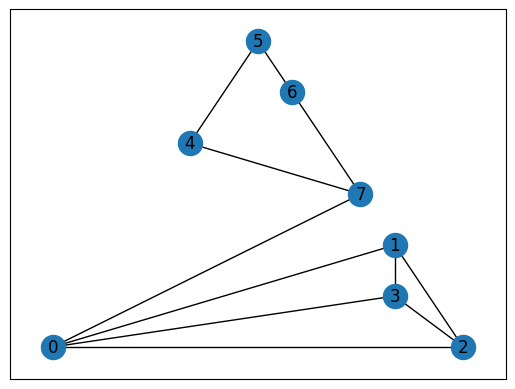

In [2]:
G_st = st_graph()   
plot_planar(G_st)

ic| cut_vertices: [7, 0]


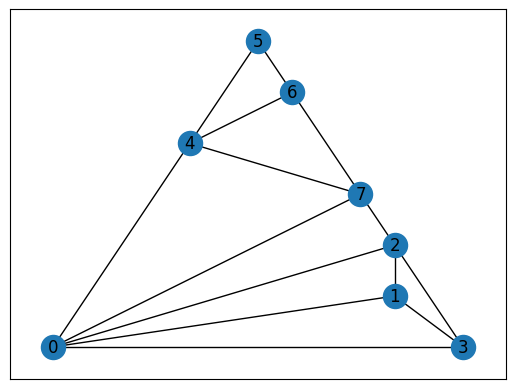

In [3]:
p = Processor(G_st)
p.augment()
pos = plot_planar(p.G, p.embed)

ic| tri.target_edge: (0, 3)
ic| 'same y', n1_y: -0.3620689655172414, n2_y: -0.3620689655172414
ic| len(l3_cycles): 8, m: 16, n: 9, m-n+1: 8


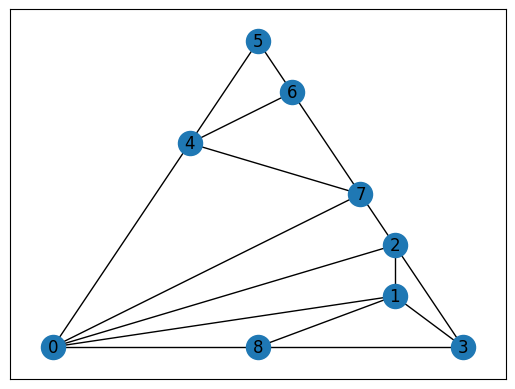

In [4]:
p.fix_separating_triangles()
plot_planar(p.G, p.s.embed)

In [5]:
p.find_cips()
p.b.cips

[[0, 8, 3, 2], [4, 5, 6]]

In [6]:
p.start_four_connect()

ic| 'Passes planarity check'


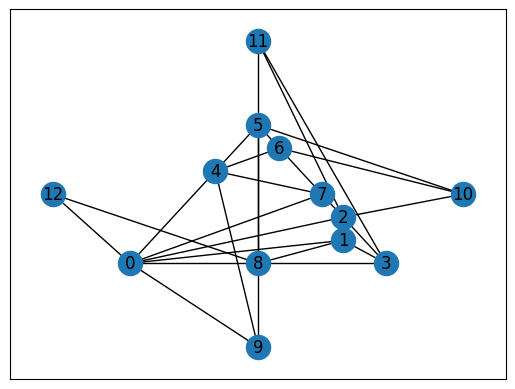

In [7]:
plot_planar(p.b.G, p.b.embed)

In [8]:
p.b.four_con

{0: CornerNode({'interior_nodes': [0, 4, 5], 'name': 'SOUTH', 'node': 9, 'coords': (-0.1724137931034483, -0.8620689655172413)}),
 1: CornerNode({'interior_nodes': [5, 6, 2], 'name': 'EAST', 'node': 10, 'coords': (1.1551724137931034, 0.051724137931034475)}),
 2: CornerNode({'interior_nodes': [2, 3, 8], 'name': 'NORTH', 'node': 11, 'coords': (-0.1724137931034483, 0.9655172413793103)}),
 3: CornerNode({'interior_nodes': [8, 0], 'name': 'WEST', 'node': 12, 'coords': (-1.5, 0.051724137931034475)})}

## scratch work 

In [10]:
new_edges = []
for node in p.b.four_con[0].interior_nodes:
    new_edges.append((10, node))
new_edges


[(10, 0), (10, 4), (10, 5)]

In [11]:
type(p.embed) == dict

True

In [12]:
type(nx.planar_layout(p.G))

dict

In [13]:
p.embed

{0: array([-1.        , -0.36206897]),
 1: array([ 0.37931034, -0.22413793]),
 2: array([ 0.37931034, -0.0862069 ]),
 3: array([ 0.65517241, -0.36206897]),
 4: array([-0.44827586,  0.18965517]),
 5: array([-0.17241379,  0.46551724]),
 6: array([-0.03448276,  0.32758621]),
 7: array([0.24137931, 0.05172414]),
 8: array([-0.17241379, -0.36206897]),
 9: (-0.1724137931034483, -0.8620689655172413),
 10: (1.1551724137931034, 0.051724137931034475),
 11: (-0.1724137931034483, 0.9655172413793103),
 12: (-1.5, 0.051724137931034475)}

In [14]:
Domain(0,4,6,8)

Domain({'x_min': 0, 'x_max': 4, 'y_min': 6, 'y_max': 8})

In [15]:
d = find_min_max_coordinates(list(p.embed.values()))
d

Domain({'x_min': -1.5, 'x_max': 1.1551724137931034, 'y_min': -0.8620689655172413, 'y_max': 0.9655172413793103})

In [16]:

fc = {k:CornerNode(name=n) for k,n in zip(range(4), ["SOUTH", "EAST", "NORTH", "WEST"])}
fc

{0: CornerNode({'interior_nodes': None, 'name': 'SOUTH', 'node': None, 'coords': None}),
 1: CornerNode({'interior_nodes': None, 'name': 'EAST', 'node': None, 'coords': None}),
 2: CornerNode({'interior_nodes': None, 'name': 'NORTH', 'node': None, 'coords': None}),
 3: CornerNode({'interior_nodes': None, 'name': 'WEST', 'node': None, 'coords': None})}

In [17]:
get_key_by_value(fc, "SOUTH", object=True)

0

In [18]:
fc[get_key_by_value(fc, "SOUTH", object=True)].coords = (3,5)

In [19]:
fc

{0: CornerNode({'interior_nodes': None, 'name': 'SOUTH', 'node': None, 'coords': (3, 5)}),
 1: CornerNode({'interior_nodes': None, 'name': 'EAST', 'node': None, 'coords': None}),
 2: CornerNode({'interior_nodes': None, 'name': 'NORTH', 'node': None, 'coords': None}),
 3: CornerNode({'interior_nodes': None, 'name': 'WEST', 'node': None, 'coords': None})}

In [20]:
any_attribute_matches_value(fc[1], "SOUTH")

False

In [21]:
fc[0]

CornerNode({'interior_nodes': None, 'name': 'SOUTH', 'node': None, 'coords': (3, 5)})

In [22]:
fc[0].interior_nodes = [3,4,5]

In [23]:
fc

{0: CornerNode({'interior_nodes': [3, 4, 5], 'name': 'SOUTH', 'node': None, 'coords': (3, 5)}),
 1: CornerNode({'interior_nodes': None, 'name': 'EAST', 'node': None, 'coords': None}),
 2: CornerNode({'interior_nodes': None, 'name': 'NORTH', 'node': None, 'coords': None}),
 3: CornerNode({'interior_nodes': None, 'name': 'WEST', 'node': None, 'coords': None})}

In [24]:
# np.diff(d[0])
# np.diff(d[1])
# todo make a scaling factor...
buffer = 1
# south pos 
x_mid = np.mean([d.x_max, d.x_min])
y_mid = np.mean([d.y_max, d.y_min])

s_pos = (x_mid, d.y_min - buffer)
n_pos = (x_mid, d.y_max + buffer)

e_pos = (d.x_min - buffer, y_mid)
w_pos = (d.x_max + buffer, y_mid)



In [25]:
for ix, k in enumerate(p.b.four_con.items()):
    new_node = len(p.b.G.nodes) + ix 
    p.b.embed[new_node] = pos..

    print(new_node)



SyntaxError: invalid syntax (2121109530.py, line 3)

In [ ]:
p.G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8))

In [ ]:
p.b.boundary_nodes

array([0, 3, 5, 8, 4, 2, 6, 7])

### four connection 

In [ ]:
G = p.G
boundary = p.b.boundary_nodes
cips = p.b.cips
n = len(G.nodes)
ic(boundary, cips, n);

ic| boundary: array([0, 3, 5, 8, 4, 2, 6, 7])
    cips: [[0, 8, 3, 2], [4, 5, 6]]
    n: 9


In [ ]:
# basicaly, organize the cips so that the alignment matches up with the boundary cycle 
n_cips = total_length(cips)
boundary_cycles =  []
for c in nx.simple_cycles(p.b.boundary_graph, n_cips+1):
    if len(c) >= n_cips+1:
        boundary_cycles.append(c)

boundary_cycles = boundary_cycles[0]

cip_nodes = [item for sublist in cips for item in sublist]
diff = (list(set(boundary_cycles).difference(set(cip_nodes))))
for d in diff:
    boundary_cycles.remove(d)



In [ ]:
four_dist(boundary_cycles)

NameError: name 'four_dist' is not defined

In [ ]:
# my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# # random.shuffle(my_list)

# boundary_cycles = my_list
# print(len(boundary_cycles))
# boundary_cycles


In [ ]:
def four_dist0(boundary_cycles):
    num_connect = 4 #ewswn
    j = (len(boundary_cycles) // (num_connect -1)) + 1
    
    end_indices = [j*(i+1) - i for i in range(num_connect - 1)]
    ic(end_indices)
    four_con = {}
    for ix, end_index in enumerate(end_indices):
        four_con[ix] = boundary_cycles[end_index-j:end_index]

    leftover = len(boundary_cycles) - four_con[ix][-1]

    k = len(boundary_cycles) % (num_connect - 1)
    ic(j, k, len(boundary_cycles), leftover);
    four_con[ix+1] = [boundary_cycles[-k], boundary_cycles[0]]
    return four_con

In [ ]:
def four_dist(boundary_cycles):
    wrap_list = boundary_cycles #+ [boundary_cycles[0]]
    num_connect = 4 #ewswn
    j = (len(boundary_cycles) // (num_connect -1)) + 1
    
    end_indices = [j*(i+1) - i for i in range(num_connect )]
    ic(end_indices)
    four_con = {}
    for ix, end_index in enumerate(end_indices):
        four_con[ix] = wrap_list[end_index-j:end_index]
        
    if len(four_con[3]) < 2:
        four_con[3] = [boundary_cycles[-1], boundary_cycles[0]]


    # k = len(boundary_cycles) % (num_connect - 1)
    # ic(j, k, len(boundary_cycles), leftover);
    # four_con[ix+1] = [boundary_cycles[-k], boundary_cycles[0]]
    return four_con

In [ ]:
# TODO save these experiments that show the behavior .. 
print(four_dist(list(range(4))))
print(four_dist(list(range(8))))
print(four_dist(list(range(12))))


ic| end_indices: [2, 3, 4, 5]
ic| end_indices: [3, 5, 7, 9]
ic| end_indices: [5, 9, 13, 17]


{0: [0, 1], 1: [1, 2], 2: [2, 3], 3: [3, 0]}
{0: [0, 1, 2], 1: [2, 3, 4], 2: [4, 5, 6], 3: [6, 7]}
{0: [0, 1, 2, 3, 4], 1: [4, 5, 6, 7, 8], 2: [8, 9, 10, 11], 3: [11, 0]}


In [ ]:
print(four_dist(list(range(3))))
print(four_dist(list(range(7))))
print(four_dist(list(range(11))))

ic| end_indices: [2, 3, 4, 5]
ic| end_indices: [3, 5, 7, 9]
ic| end_indices: [4, 7, 10, 13]


{0: [0, 1], 1: [1, 2], 2: [2], 3: [2, 0]}
{0: [0, 1, 2], 1: [2, 3, 4], 2: [4, 5, 6], 3: [6, 0]}
{0: [0, 1, 2, 3], 1: [3, 4, 5, 6], 2: [6, 7, 8, 9], 3: [9, 10]}


In [ ]:
print(four_dist(list(range(2))))
print(four_dist(list(range(6))))
print(four_dist(list(range(10))))

ic| end_indices: [1, 1, 1, 1]
ic| end_indices: [3, 5

{0: [0], 1: [0], 2: [0], 3: [1, 0]}


, 7, 9]
ic| end_indices: [4, 7, 10, 13]


{0: [0, 1, 2], 1: [2, 3, 4], 2: [4, 5], 3: [5, 0]}
{0: [0, 1, 2, 3], 1: [3, 4, 5, 6], 2: [6, 7, 8, 9], 3: [9, 0]}


### 4-completion

In [ ]:
def four_completion(G, boundary, cips):
    if len(boundary) == 3:
        v1, v2, v3 = boundary
        corner_points = boundary
    else:
        
        if n < 4:
            for i in range(n+1, 4):
                pass 
    
